In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
df = pd.read_csv('HRDataset.csv')

W tym module analizowaliśmy bazę danych z informacjami dotyczącymi pracowników pewnego amerykańskiego przedsiębiorstwa. Główną wagę przywiązaliśmy do stawki wynagrodzenia, jest tam jednak wiele innych obszarów, którym moglibyśmy się przyjrzeć. Jako zadanie zastanów się i postaraj się odpowiedzieć na następujące pytania:

Czy istnieje zależność pomiędzy tym, kto jest bezpośrednim przełożonym (ManagerName, ManagerID) danego pracownika, a oceną wydajności pracy (PerformanceScore)?
Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?
Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?
Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?
Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?


In [5]:
df.columns

Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'PayRate', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'],
      dtype='object')

In [50]:
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Seniority
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,10.923288
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,5.726027
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,4.997260
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN,0.158904
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,4.410959


In [6]:
pd.crosstab(df['ManagerName'],df['PerformanceScore']) #Miller ma najwiecje pracownikow z wynikiem 'exceeds', a najmn iej Eric Dougall

PerformanceScore,Exceeds,Fully Meets,Needs Improvement,PIP
ManagerName,,,,
Alex Sweetwater,2,6,1,0
Amy Dunn,3,15,1,2
Board of Directors,0,2,0,0
Brandon R. LeBlanc,0,7,0,0
Brannon Miller,7,9,1,4
Brian Champaigne,0,8,0,0
David Stanley,1,19,1,0
Debra Houlihan,0,2,1,0
Elijiah Gray,2,18,2,0


Jakie źródła pozyskania pracownika (Recruitment Source) są najlepsze, jeśli zależy nam na jak najdłuższym stażu pracowników?

In [8]:
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')

In [9]:
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire'])/np.timedelta64(365,'D')

In [10]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)

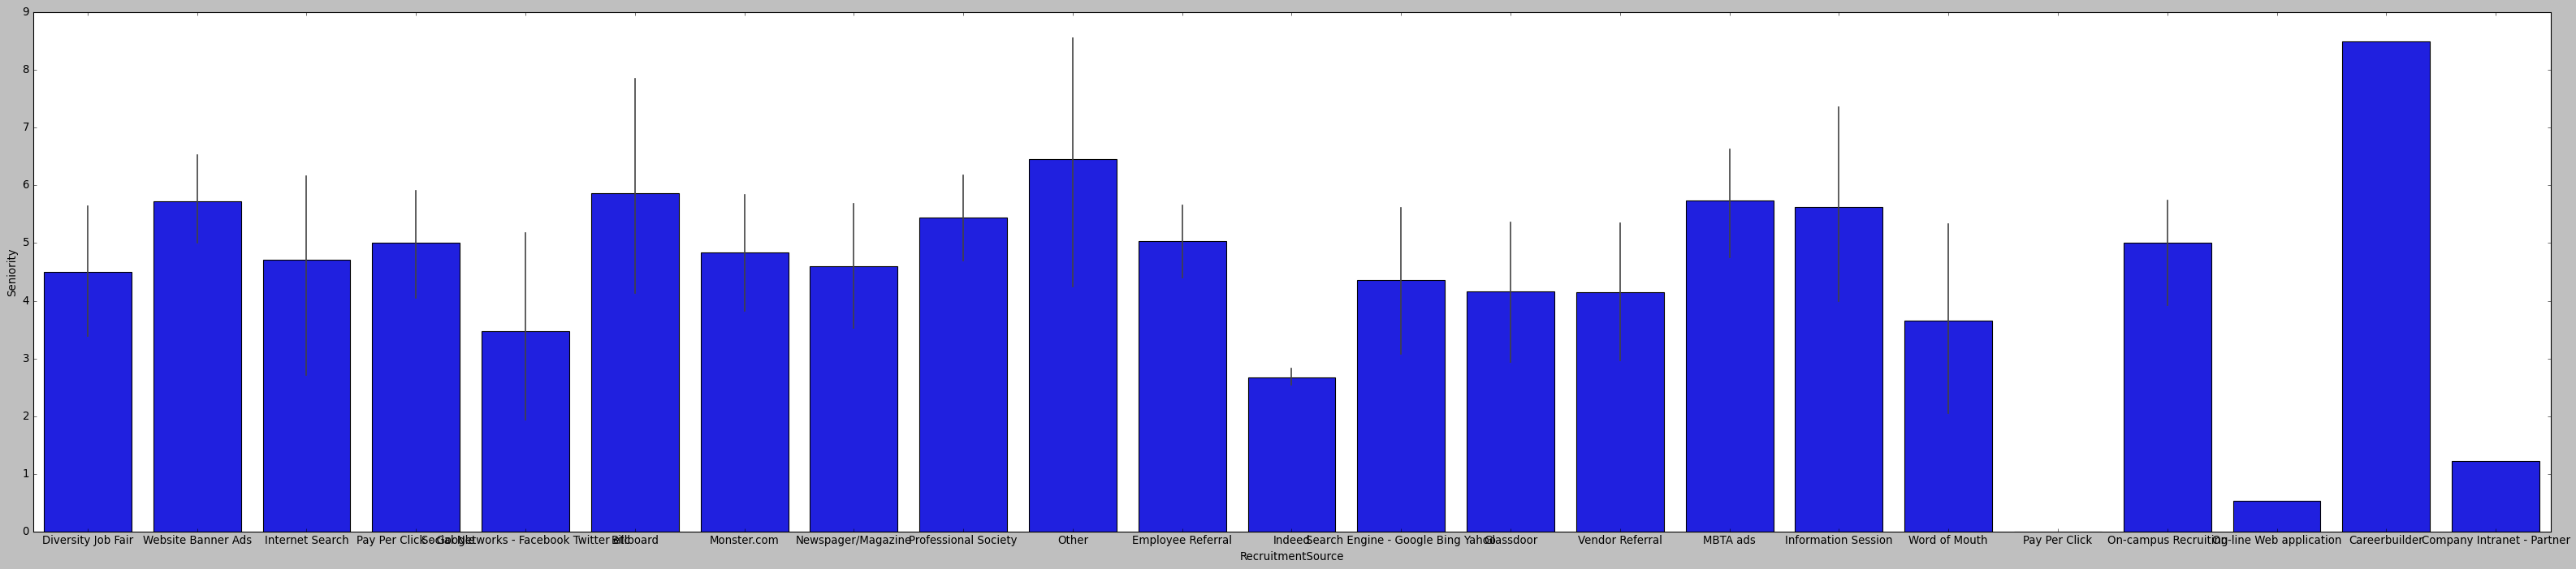

In [42]:
plt.figure(figsize=(50,10))
sns.barplot(x='RecruitmentSource',y='Seniority', data=df)
plt.show() # zdecydowanie najlepszym zrodlem jest 'careerbuilderCopany'

Czy stan cywilny (MartialDesc) pracownika koreluje w jakikolwiek sposób z zadowoleniem z pracy (EmpSatisfaction)?

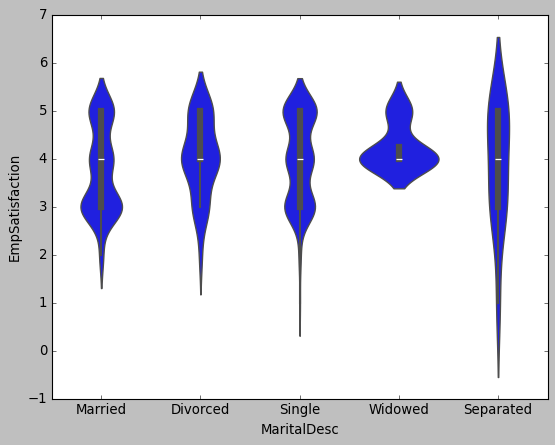

In [46]:
sns.violinplot(x='MaritalDesc',y='EmpSatisfaction',data=df)
plt.show()

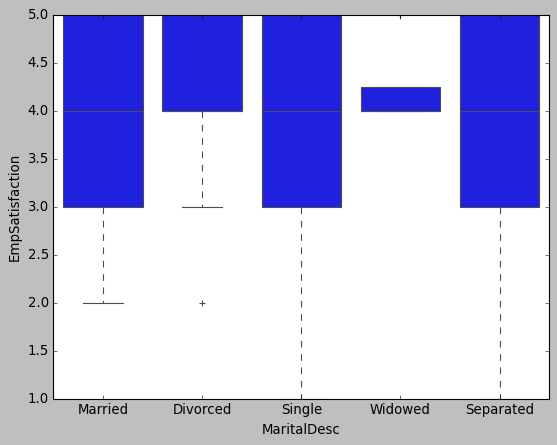

In [48]:
sns.boxplot(x='MaritalDesc',y='EmpSatisfaction',data=df)
plt.show() #zadowolenie z pracy u 'married', 'single' and 'separated' rozklada si epodobnie, u divorced and wiwdowed jest wyzszy poziom zadowolenia

Jak wygląda struktura wieku aktualnie zatrudnionych pracowników?

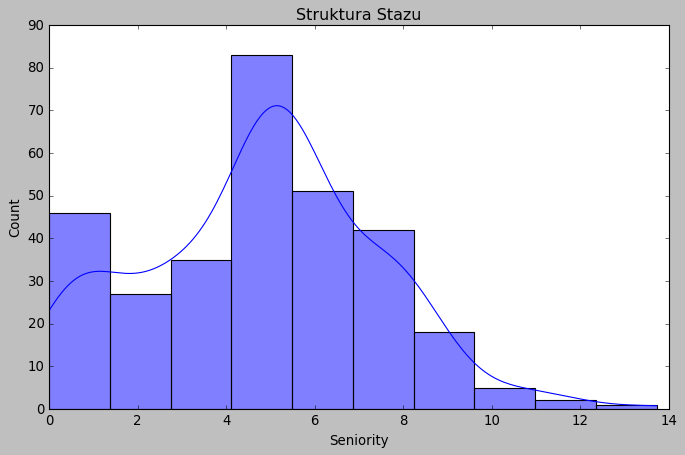

In [56]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Seniority'], bins=10, kde=True)  # kde=True dodaje wykres gęstości
plt.title('Struktura Stazu')
plt.xlabel('Seniority')
plt.ylabel('Count')
plt.show() # najwiecej pracownikow jest z 4-6 letnim stazem

 Czy starsi pracownicy pracują nad większą liczbą specjalnych projektów niż młodsi pracownicy?

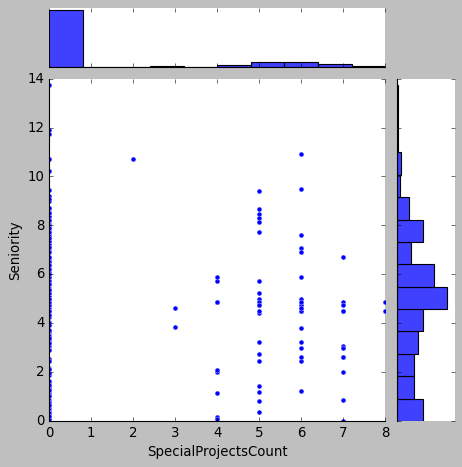

In [60]:
sns.jointplot(x='SpecialProjectsCount',y='Seniority',data=df)
plt.show() #najwieksza liczbe projektow maja pracownicy z 4-6 letnim stazem, tych pracownikow jest tez najwiecej